# **C964 Computer Science Capstone:**
## **Matching Adoptable Cats with Potential Adopters Based on the 'Feline Five' Cat Traits**

The purpose of this application is to demonstrate the use of machine learning along with two datasets of cat information in order to predict possible matching cats for potential adopters based on the adopters' preferences in regards to what is known as the 'Feline Five':

1. **Extraversion**:  A high score in extraversion identifies a cat that is smart, curious and inventive.  These cats may require extra stimulation to prevent boredom.
   
2. **Dominance**:  A cat that scores high in dominance may bully other cats.  These cats may prefer being the only pet in the household.

3. **Impulsiveness**:  High scores in impulsiveness may indicate erractic and restless cats, such as those that enjoy meowing at the top of their lungs in the middle of the night.  While this may be normal for some, it is also a potential indicator of stress.  Potential owners may keep this score in mind as a way to help pinpoint sources of stress for their cat, or as an indicator they may need help from a behaviorist.

4. **Agreeableness**:  Agreeable cats are well-adjusted, friendly, and exhibit body language that says "I'm happy!"  High scores in agreeableness indicate cats that may love cuddling, and aren't afraid to demand pets from strangers.

5. **Neuroticism**:  If a cat scores high in neuroticism, they may be insecure, anxious, suspicious, shy, and fearful of people.  These cats might prefer a home with plenty of hiding spots and quiet places away from foot traffic.

Each dataset began with a 'Domestic Cat Personality Dataset' located on the UniSA Research Data Access Portal at the following link:

https://data.unisa.edu.au/dap/Dataset.aspx?DatasetID=271178

I ordered each of the 52 traits from the study according to which of the 'Feline Five' personality traits they fell under, and came up with an average number for the 'Feline Five' traits.  All other preexisting data was removed in order to create my own datasets that better suited my project.  Trait columns were randomized in the adoptable_cats CSV so it wouldn't be a one-for-one match with the cat_data CSV.

'Name', 'Gender', 'Age Group', and 'Coat Color' columns were then added into each CSV file, and randomized using the code below.  Female and male names are randomized from a list of 140 names for each gender.  The Calico, Tortoiseshell, and Torbie coat colors and their variants are randomized, but restricted to females only, as the chances of those coat colors appearing on males are very rare.

In [151]:
import pandas as pd
import numpy as np
import random
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from IPython.display import display, HTML
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from ipywidgets import widgets, VBox, HBox

In [152]:
# Modify csv files to randomize names, genders, coat colors, and age groups

# Randomize gender
df = pd.read_csv('cat_data.csv')
np.random.seed(42) # Random seed for reproducibility
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df)) # Randomize gender column in cat_data.csv
df.to_csv('cat_data.csv', index=False) # Save csv file

df2 = pd.read_csv('adoptable_cats.csv')
np.random.seed(24) # Different random seed to produce different randomization from cat_data.csv, change to randomize again
df2['Gender'] = np.random.choice(['Male', 'Female'], size=len(df2)) # Randomize gender column in adoptable_cats.csv
df2.to_csv('adoptable_cats.csv', index=False) # Save csv file

# List of random names and coat colors
female_names = ['Athena', 'Bailey', 'Bella', 'Bitsy', 'Blossom', 'Boots', 'Callie', 'Calliope', 'Calypso', 'Chloe', 'Cleo', 'Daisy', 'Delphi', 'Duchess', 
                'Edie', 'Evie', 'Gizmo', 'Jasmine', 'Kitty', 'Lexi', 'Lucy', 'Luna', 'Maisy', 'Meg', 'Millie', 'Molly', 'Nyxi', 'Oreo', 'Penny', 'Persephone',
                'Piper', 'Poppy', 'Portia', 'Princess', 'Ruby', 'Sophie', 'Taffy', 'Tilly', 'Xena', 'Misty', 'Mischief', 'Muffin', 'Rasha', 'Matcha', 'Mochi',
                'Nala', 'Bast', 'Ivy', 'Winnie', 'Hattie', 'Minerva', 'Pancake', 'Peaches', 'Nova', 'Pi ', 'Pumpkin', 'Jinxy', 'Sadie', 'Lilith', 'Lily', 
                'Kiwi', 'Izzy', 'Suki', 'Maddy', 'Nila', 'Nola', 'Starlight', 'Gilly', 'Nora', 'Anna', 'Clawdia', 'Sprinkles', 'Celeste', 'Avery', 'Sierra', 
                'Buttercup', 'Natasha', 'Tasha', 'Dolly', 'Alina', 'Delfina', 'Parsnip', 'Lilo', 'Katrina', 'Stella', 'Nikki', 'Vikki', 'Missy', 'Chai', 
                'Bianca', 'Felicity', 'Rosie', 'Libby', 'Betsy', 'Dora', 'Pistachio', 'Jinx', 'Marshmallow', 'Sasha', 'Peanut', 'Coffee', 'Penelope', 
                'Tawny', 'Winter', 'Gypsy', 'Snickers', 'Murphy', 'Eden', 'Vesper', 'Rogue', 'Zelda', 'Agatha', 'Agnes', 'Tulip', 'Sassy', 'Petunia', 
                'Tali', 'Cordelia', 'Sylvanas', 'Sylphrena', 'Navani', 'Shallan', 'Jasnah', 'Aurora', 'Sheba', 'Wanda', 'Zoe', 'Darla', 'Olive', 'Freya', 
                'Cleocatra', 'Galadriel', 'Eowyn', 'Arwen', 'Aloy', 'Liara', 'Kasumi', 'Leliana', 'Morrigan', 'Flemeth']

male_names = ['Atticus', 'Austin', 'Axel', 'Basil', 'Boots', 'Cas', 'Charlie', 'Dante', 'Dean', 'Felix', 'Finn', 'Gatsby', 'Helios', 'Hunter', 'Jasper', 
              'Jinx', 'Julian', 'Latte', 'Leo', 'Loki', 'Max', 'Milo', 'Mittens', 'Noodle', 'Oliver', 'Oreo', 'Patch', 'Rocky', 'Sam', 'Shadow', 'Simba', 
              'Smokey', 'Smudge', 'Stitch', 'Sylvester', 'Tiger', 'Waffles', 'Ziggy', 'Nibbler', 'Sushi', 'Nacho', 'Biscuit', 'Kimchi', 'Nugget', 'Tater', 
              'Cosmo', 'Apollo', 'Atlas', 'Jerry', 'Scout', 'Figaro', 'Bagel', 'Neptune', 'Donut', 'Binx', 'Salem', 'Fritz', 'Cricket', 'Orion', 'Nelson', 
              'George', 'Ozzy', 'Soju', 'Matty', 'Mika', 'Buccatini', 'Macaroni', 'Beau', 'Kona', 'Dorian', 'Clawde', 'Sprinkles', 'Remi', 'Neil', 'Wilson', 
              'Nemo', 'Neo', 'Avi', 'Lenny', 'Alfred', 'Rick', 'Morty', 'Chester', 'Chestnut', 'Sammy', 'Nico', 'Rico', 'Cielo', 'Nero', 'Linguine', 
              'Hendrix', 'Furman', 'Cooper', 'Graham', 'Fergus', 'Marshmallow', 'Kodi', 'Ash', 'Acorn', 'Peanut', 'Coffee', 'Fiddler', 'Romeo', 'Winter', 
              'Clyde', 'Snickers', 'Murphy', 'Cash', 'Vesper', 'Rogue', 'Maximus', 'Merlin', 'Norbert', 'Mufasa', 'Lucifer', 'Enzo', 'Garrus', 'Spike', 
              'Arthas', 'Kaladin', 'Dalinar', 'Adolin', 'Wit', 'Zeke', 'Lucky', 'Reptar', 'August', 'Gabe', 'Trouble', 'Catsanova', 'Copurrnicus', 'Frodo', 
              'Gimli', 'Bilbo', 'Wrex', 'Mordin', 'Zevran', 'Cullen', 'Alistair', 'Anders']

coat_colors = ['Black', 'White', 'Chocolate', 'Gray', 'Orange', 'Cream', 'Lilac', 'Black and White', 'Gray and White', 'Chocolate and White', 
               'Orange and White','Gray Tabby', 'Chocolate Tabby', 'Calico', 'Tortoiseshell', 'Torbie', 'Gray and White Tabby', 'Brown and White Tabby', 
               'Cinnamon', 'Red', 'Fawn', 'Silver Tabby', 'Red Tabby', 'Cream Tabby', 'Dilute Tortoiseshell', 'Lilac Tortoiseshell', 'Dilute Calico', 
               'Dilute Torbie']

age_groups = ['Kitten', 'Young Adult', 'Mature Adult', 'Senior']

# Function to assign random names, coat colors, and age groups
def assign_random_attributes(row):
    if row['Gender'] == 'Female':
        row['Name'] = random.choice(female_names)
        row['Coat Color'] = random.choice(coat_colors)
        row['Age Group'] = random.choice(age_groups)
    else:
        row['Name'] = random.choice(male_names)
        row['Coat Color'] = random.choice([color for color in coat_colors if color not in ['Calico', 'Tortoiseshell', 'Torbie', 'Dilute Tortoiseshell',
                                                                                           'Lilac Tortoiseshell', 'Dilute Calico', 'Dilute Torbie']])
        row['Age Group'] = random.choice(age_groups)
    return row

# Apply function to each row in both csv files
df = df.apply(assign_random_attributes, axis=1)
df.to_csv('cat_data.csv', index=False)

df2 = df2.apply(assign_random_attributes, axis=1)
df2.to_csv('adoptable_cats.csv', index=False)

---
## Feature Engineering

In the 'cat_data' CSV file, we incorporate feature engineering techniques to enhance the adoption prediction model.  This process involves assigning weights to each of the 'Feline Five' traits, reflecting their relative importance in determining adoptability.

In [153]:
cat_data = pd.read_csv('cat_data.csv')

# Define weights for each 'Feline Five' trait
weights = {
    'Extraversion': 0.4,
    'Dominance': -0.2,
    'Impulsiveness': -0.1,
    'Agreeableness': 0.3,
    'Neuroticism': -0.1
}

# Compute the weighted score for each cat
cat_data['Weighted Score'] = (cat_data['Extraversion'] * weights['Extraversion'] +
                              cat_data['Dominance'] * weights['Dominance'] +
                              cat_data['Impulsiveness'] * weights['Impulsiveness'] +
                              cat_data['Agreeableness'] * weights['Agreeableness'] +
                              cat_data['Neuroticism'] * weights['Neuroticism'])

# Normalize the weighted scores between 1 and 0
min_score = cat_data['Weighted Score'].min()
max_score = cat_data['Weighted Score'].max()
cat_data['Adoption Probability'] = (cat_data['Weighted Score'] - min_score) / (max_score - min_score)

# Convert probability to percentage
cat_data['Adoption Probability'] = cat_data['Adoption Probability'] * 100

# Round probability to two decimal places
cat_data['Adoption Probability'] = cat_data['Adoption Probability'].round(2)

# Determine 'Adopted' Status based on the probability
threshold = 50
cat_data['Adopted'] = cat_data['Adoption Probability'].apply(lambda x: 'Yes' if x >= threshold else 'No')

# Save the data
cat_data.to_csv('cat_data.csv', index=False)

---
## Data Processing

Next, the cat_data dataset is preprocessed, and split into training and testing sets, and the machine learning model is trained.

'X' contains the feature columns ('Feline Five' traits) that will be used to predict adoption.

'y' is the traget variable 'Adopted', indicating whether each cat was adopted or not.

The dataset is then split into training and testing sets, where 'X_train' and 'y_train' are used to train the model, and 'X_test' and 'y_test' are used to evaluate the model's performance.

The preprocessing pipeline defines how to preprocess the data, and includes preprocesing and model training steps.  The model is then fit to the training data and trained.

Finally, the model's performance on the test data is evaluated, and it's overall performance is evaluated using cross-validation.

In [154]:
cat_data = pd.read_csv('cat_data.csv')
adoptable_cats = pd.read_csv('adoptable_cats.csv')

# Preprocess training data
X = cat_data[['Extraversion', 'Dominance', 'Impulsiveness', 'Agreeableness', 'Neuroticism']]
y = cat_data['Adopted']
y_binary = y.map({'No': 0, 'Yes': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Extraversion', 'Dominance', 'Impulsiveness', 'Agreeableness', 'Neuroticism']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state = 42))])

# Train the ML model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(cm_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Round cross-validation scores to two decimal places
rounded_cv_scores = [round(score, 2) for score in cv_scores]
mean_cv_score = round(cv_scores.mean(), 2)

print(f'Cross-validation accuracy scores: {rounded_cv_scores}')
print(f'Mean accuracy score: {mean_cv_score}')

Confusion Matrix (Test Set):
[[185   4]
 [  5 367]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       189
           1       0.99      0.99      0.99       372

    accuracy                           0.98       561
   macro avg       0.98      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561

Cross-validation accuracy scores: [0.98, 0.99, 0.99, 0.99, 0.98]
Mean accuracy score: 0.99


---
The adoptable_cats.csv file is preprocessed the same as cat_data.csv, and the machine learning model predicts whether or not a cat will be adopted based on the data it was trained and tested on.

The results are shown in the table below.

In [155]:
# Load adoptable_cats
adoptable_cats = pd.read_csv('adoptable_cats.csv')

# Preprocess and predict adoptable_cats.csv
adoptable_cats_preprocessed = pipeline.named_steps['preprocessor'].transform(adoptable_cats[numeric_features])

# Predict adoption probabilities for the available cats
adoptable_cats['Adoption Probability'] = pipeline.predict_proba(adoptable_cats[numeric_features])[:, 1] * 100

# Round probability to two decimal places
adoptable_cats['Adoption Probability'] = adoptable_cats['Adoption Probability'].round(2).astype(str) + '%'

# Display the predicted adoption results
# Generate HTML for adoptable cats
html = adoptable_cats[['Name', 'Gender', 'Age Group', 'Coat Color', 'Adoption Probability']].to_html(index=False, classes='table table-striped')

# Define and add CSS to center table contents and change table width to 100%
custom_css = """
<style>
.table {
    width: 100%;
}
.table td, .table th {
    text-align: center !important;
}
</style>
"""
# Display the table
display(HTML(custom_css + html))

Name,Gender,Age Group,Coat Color,Adoption Probability
Rocky,Male,Kitten,Orange,43.0%
Lilith,Female,Mature Adult,Tortoiseshell,89.0%
Helios,Male,Kitten,Fawn,98.0%
Taffy,Female,Mature Adult,Gray and White Tabby,100.0%
Missy,Female,Kitten,Black and White,100.0%
Eden,Female,Kitten,Red Tabby,31.0%
Kasumi,Female,Mature Adult,Fawn,99.0%
Arthas,Male,Young Adult,Gray and White,100.0%
Nola,Female,Senior,Torbie,100.0%
Gizmo,Female,Mature Adult,Chocolate Tabby,20.0%


---
## User Interface

Finally, an interface allows users to choose numerical values between 1 and 10 for each trait based on their preferences.  Once the desired values have been selected on each slider and the user presses the 'Find Matching Cats!' button, the five closest matches are found by calculating the Euclidean distance between the user input and each cat's traits.  

The results also display the adoption prediction and adoption probability for each cat, for potential adopters who may want to find cats that are less likely to be adopted and provide them a loving home.

The reset button can be used to reset the sliders to their default starting value (5) and clear the matching cat list.

In [156]:
# Trait descriptions for user reference
trait_descriptions = {
    'Extraversion': 'Measures sociability, assertiveness, and talkativeness.',
    'Dominance': 'Measures the degree of influence and control a cat seeks.',
    'Impulsiveness': 'Measures how likely a cat is to act on their impulses.',
    'Agreeableness': 'Measures how cooperative and friendly a cat is.',
    'Neuroticism': 'Measures how shy, insecure, and cautious of new things and people a cat is.'
}

headers = {
    'Extraversion': 'Extraversion',
    'Dominance': 'Dominance',
    'Impulsiveness': 'Impulsiveness',
    'Agreeableness': 'Agreeableness',
    'Neuroticism': 'Neuroticism'
}    

# Define user input sliders
ext_slider = widgets.IntSlider(min=1, max=10, step=1, value=5)
dom_slider = widgets.IntSlider(min=1, max=10, step=1, value=5)
imp_slider = widgets.IntSlider(min=1, max=10, step=1, value=5)
agr_slider = widgets.IntSlider(min=1, max=10, step=1, value=5)
neu_slider = widgets.IntSlider(min=1, max=10, step=1, value=5)

# Create a widget for each trait
def create_trait_widget(trait, slider):
    header = widgets.HTML(value=f"<h3 style='margin: 0; padding: 0;'>{headers[trait]}</h3>")
    description = widgets.HTML(value=f"<p style='margin: 0; padding: 0;'>{trait_descriptions[trait]}</p>")
    return VBox([header, description, slider])

ext_widget = create_trait_widget('Extraversion', ext_slider)
dom_widget = create_trait_widget('Dominance', dom_slider)
imp_widget = create_trait_widget('Impulsiveness', imp_slider)
agr_widget = create_trait_widget('Agreeableness', agr_slider)
neu_widget = create_trait_widget('Neuroticism', neu_slider)

# Create a VBox for all trait widgets
sliders_box = VBox([
    widgets.HTML("<h2>Choose Your Desired Trait Scores</h2>"),
    ext_widget,
    dom_widget,
    imp_widget,
    agr_widget,
    neu_widget
])

# Output area to display results
output = widgets.Output()

# Function to find matching adoptable cats
def find_matching_cats(extraversion, dominance, impulsiveness, agreeableness, neuroticism):
    user_preferences = np.array([extraversion, dominance, impulsiveness, agreeableness, neuroticism]).reshape(1, -1)
    user_preferences_df = pd.DataFrame(user_preferences, columns = numeric_features)
    cat_traits = adoptable_cats[numeric_features]

    # Preprocess adoptable cats data
    adoptable_cats_preprocessed = pipeline.named_steps['preprocessor'].transform(cat_traits)
    user_preferences_preprocessed = pipeline.named_steps['preprocessor'].transform(user_preferences_df)

    # Predict adoption probabilities for all adoptable cats, multiply by 100 to convert from a value between 0 and 1 to a percentage
    adoptable_cats['Adopted Probability'] = pipeline.predict_proba(adoptable_cats[numeric_features])[:, 1] * 100

    # Convert probabilities to percentage format
    adoptable_cats['Adopted Probability'] = adoptable_cats['Adopted Probability'].apply(lambda x: f"{x:.2f}%")

    # Calculate Euclidean distance between user preferences and each cat's traits
    distances = np.linalg.norm(adoptable_cats_preprocessed - user_preferences_preprocessed, axis = 1)

    # Get indices of closest matches
    closest_matches_indices = np.argsort(distances)[:5]

    # Return list of matching cats
    matching_cats = adoptable_cats.iloc[closest_matches_indices]
    return matching_cats
            
# Button to trigger prediction
match_button = widgets.Button(description="Find Matching Cats!")

# Function to handle button click
def on_button_clicked(b):
    with output:
        output.clear_output()
        ext = ext_slider.value
        dom = dom_slider.value
        imp = imp_slider.value
        agr = agr_slider.value
        neu = neu_slider.value

        matching_cats = find_matching_cats(ext, dom, imp, agr, neu)

        if not matching_cats.empty:
            # Define and add CSS to center table contents and change table width to 100%
            custom_css = """
            <style>
            .table td, .table th {
                text-align: center !important;
            }
            .table {
                width: 100%;
            }
            </style>
            """
            html = matching_cats[['Name', 'Gender', 'Age Group', 'Coat Color', 'Extraversion','Dominance', 'Impulsiveness', 'Agreeableness', 'Neuroticism',
                                  'Adoption Probability']].to_html(index=False, classes='table table-striped')
            display(HTML(custom_css + html))
        else:
            print("No matching cats found.")

# Reset button
reset_button = widgets.Button(description="Reset")

# Function to reset sliders and clear displayed cat list
def on_reset_button_clicked(b):
        ext_slider.value = 5
        dom_slider.value = 5
        imp_slider.value = 5
        agr_slider.value = 5
        neu_slider.value = 5
        with output:
            output.clear_output()

# HBox to align buttons horizontally
button_box = HBox([match_button, reset_button])

# Display widgets and output area
match_button.on_click(on_button_clicked)
reset_button.on_click(on_reset_button_clicked)
display(sliders_box, button_box, output)

Output()

---
## **Visualizations**

### **Confusion Matrix Heatmap**
The confusion matrix evaluates the performance of the Random Forest model by showing how many predictions were true positives, false positives, true negatives, and false negatives.  For this case, the matrix illustrates how well the model is at predicting adopted vs. not adopted cats.

#### Details
* True Negatives: The number of instances correctly predicted as 'Not Adopted'
* False Positives: The number of instances incorrectly predicted as 'Adopted' when they are actually 'Not Adopted'
* False Negatives: The number of instances incorrectly predicted as 'Not Adopted' when they are actually 'Adopted
* True Positives: The number of instances correctly predicted as 'Adopted'

#### Metrics
1. Accuracy:
   * Measures the proportion of correctly predicted instances (both adopted and not adopted) out of the total number of instances.
2. Precision:
   * Measures the proportion of true positives out of all instances predicted as positive.
3. Recall:
   * Measures the proportion of true positives out of all actual positives
4. F1 Score:
   * The F1 score is the harmonic  mean of precision and recall, providing a single metric to evaluate the balance between precision and recall
   * The scores for 'Not Adopted' and 'Adopted' suggest a balance between precision and recall for each class due to the incorporated feature engineering


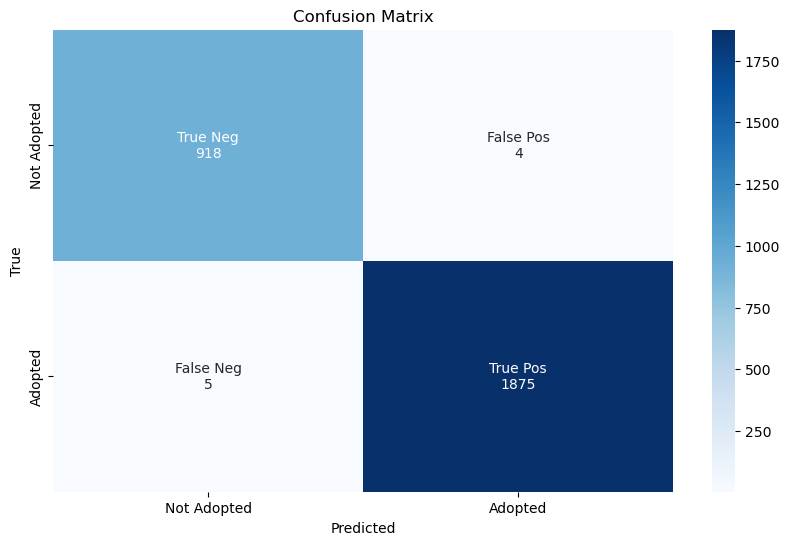

,Accuracy,Precision,Recall,F1 Score
Not Adopted,100%,99%,100%,100%
Adopted,100%,100%,100%,100%


In [157]:
# Function to create matrix
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, normalize=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True,
                          figsize=None, cmap='Blues'):
    df_cm = pd.DataFrame(cf, index=categories, columns=categories)
    plt.figure(figsize=figsize)

    if group_names and len(group_names) == cf.size:
        group_labels = [f"{name}\n{value:.0f}" for name, value in zip(group_names, cf.flatten())]
        group_labels = np.asarray(group_labels).reshape(cf.shape)
    else:
        group_labels = cf.astype(str)
    
    sns.heatmap(df_cm, annot=group_labels, fmt='' if count else '.2%', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.xlabel('Predicted')
        plt.ylabel('True')

    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf)) * 100
        precision = np.diag(cf) / np.sum(cf, axis=0) * 100
        recall = np.diag(cf) / np.sum(cf, axis=1) * 100
        f1_score = 2 * (precision * recall) / (precision + recall)

        metrics_table = f"""
        <table style="width:50%; margin: 0 0 0 50px;">
            <thead style>
                <tr style>
                    <th></th>
                    <th>Accuracy</th>
                    <th>Precision</th>
                    <th>Recall</th>
                    <th>F1 Score</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>Not Adopted</td>
                    <td>{accuracy:.0f}%</td>
                    <td>{precision[0]:.0f}%</td>
                    <td>{recall[0]:.0f}%</td>
                    <td>{f1_score[0]:.0f}%</td>
                </tr>
                <tr>
                    <td>Adopted</td>
                    <td>{accuracy:.0f}%</td>
                    <td>{precision[1]:.0f}%</td>
                    <td>{recall[1]:.0f}%</td>
                    <td>{f1_score[1]:.0f}%</td>
                </tr>
            </tbody>
        </table>
        """
       
    plt.title('Confusion Matrix')
    plt.show()

    display(HTML(metrics_table))

# Confusion Matrix for the entire dataset
y_pred_full = pipeline.predict(X)
cm_full = confusion_matrix(y_binary, y_pred_full)
make_confusion_matrix(cm_full, group_names=['True Neg', 'False Pos', 'False Neg', 'True Pos'], categories=['Not Adopted', 'Adopted'], cmap='Blues', figsize=(10, 6))

---
### **Feature Distribution Histogram**
The feature distribution histograms display the distribution of the 'Feline Five' personality traits for the cats in the adoptable cat list.

#### **Insights**
These histograms reveal the spread and concentration of trait scores within the adoptable cats dataset.  Traits such as Extraversion, Impulsiveness, and Agreeableness are widely distributed among the cats, with scores spread across the entire range from 1 to 10.  In contrast, Dominance and Neuroticism are more concentrated at lower values with a few outliers in the 5 to 10 range, suggesting that most cats have lower scores in these traits.

#### Specific Trait Insights
1. <u>Extraversion</u><br>
Extraversion scores are distributed fairly evenly, and this information could be used by shelters to match cats with potential adopters based on their preference for either highly social or more reserved cats.

2. <u>Dominance</u><br>
The Dominance distribution is skewed more toward lower scores, meaning most of the adoptable cats exhibit lower levels of dominance.  This could be useful in understanding behavioral tendencies and recommending cats to potential adopters based on whether they have other pets or are looking for a cat that would prefer to be the only pet in a household.

3. <u>Neuroticism</u><br>
Similar to Dominance, Neuroticism scores are also lower on average.  Cats with lower scores in this area may be perceived as more stable and easier to integrate into a new home.  Shelters can use this data to match cats with potential adopters that may be looking for less anxious pets, or to identify pets that may need extra time and care to adjust to a new lifestyle.

#### Applications
1. <u>Personalization</u><br>
Understanding the distribution of traits can help shelters match cats with potential adopters based on their specific preferences.  For example, if an adopter prefers a calm and non-dominant cat, shelters can prioritize cats with lower Impulsiveness and Dominance scores.

2. <u>Behavioral Profiles</u><br>
Histograms provide insights into the general behavioral tendencies of a shelter's cat population.  These insights can help staff decide which cats can be placed together within the shelter, which cats may need to be kept away from other pets or out of high-traffic shelter areas and can also help in providing tailored care to each cat (such as providing more interactive playtime and social activities for cats that rate high on Extraversion).

3. <u>Trend Analysis</u><br>
Tracking changes in trait distributions through histograms can allow shelters to assess the effectiveness of their adoption programs and identify trends that may influence how they manage and promote their cats.

#### **Summary**
By analyzing and describing cat trait histograms, shelters can be provided with actionable insights to improve cat adoption strategies.  Understanding trait distributions helps align cat profiles with adopter preferences, enhancing the match-making process, and optimizing resource allocation for better care and adoption outcomes.

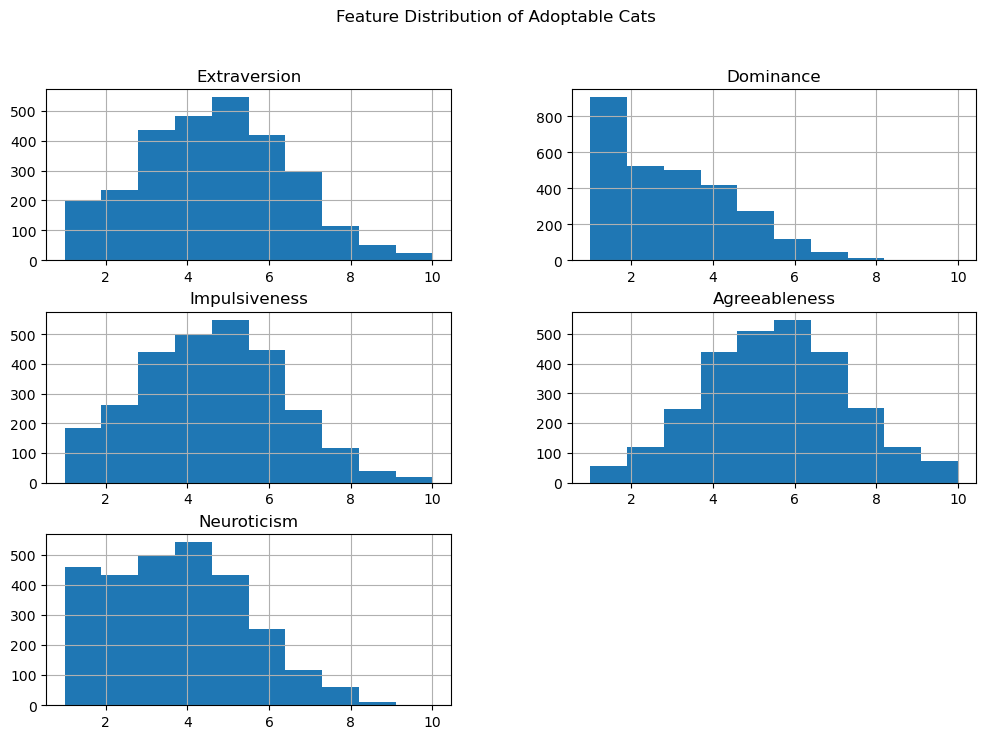

In [158]:
# Feature Distribtuion Histogram
# Plot histograms for each feature
features = ['Extraversion', 'Dominance', 'Impulsiveness', 'Agreeableness', 'Neuroticism']
adoptable_cats[features].hist(bins=10, figsize=(12, 8))
plt.suptitle('Feature Distribution of Adoptable Cats')
plt.show()

---
### **Density Plot of the Extraversion and Agreeableness Traits**
This density plot represents the density of the Extraversion and Agreeableness data points.

The x-axis constitutes the extraversion scores of the cats.  Extraversion reflects how outgoing or sociable a cat is, with higher scores indicating higher levels of extraversion.

The y-axis constitutes the agreeableness scores of the cats.  Agreeableness reflets how friendly or cooperative a cat is, with higher scores indicating higher levels of agreeableness.

The color gradient indicates the concentration of cats with specific combinations of extraversion and agreeableness scores.  Darker colors represent areas with higher concentrations of cats, meaning many cats share those particular trait scores.

Lighter colors indicate areas with fewer cats.

#### **Insights**

This plot reveals that a high concentration of cats in the adoptable cats list score in the 4 through 6 range for both agreeableness and extraversion.

Using this type of plot can help a shelter identify which cats may be more popular or suitable for adoption based on adopter preferences for sociable and friendly cats.

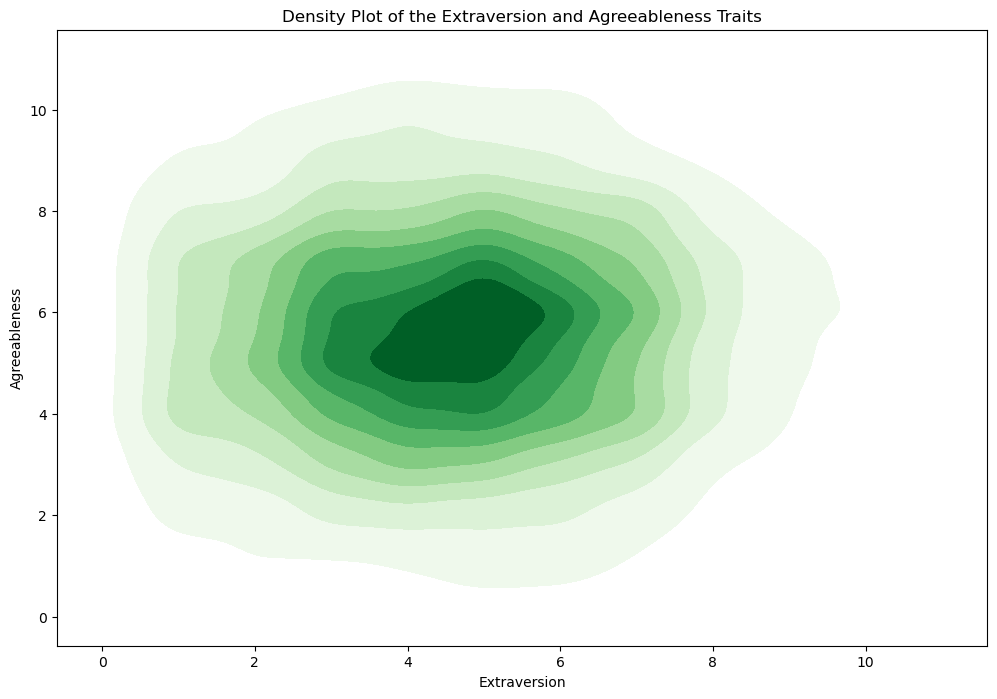

In [159]:
# Create a density plot of the two most desirable (positive) cat traits
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=adoptable_cats['Extraversion'],
    y=adoptable_cats['Agreeableness'],
    cmap='Greens',
    fill=True,
    thresh=0.05
)

plt.title('Density Plot of the Extraversion and Agreeableness Traits')
plt.xlabel('Extraversion')
plt.ylabel('Agreeableness')
plt.show()